In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu chứng khoán
df = pd.read_csv('AAPL.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df1=df.copy(deep=True)

In [4]:
#Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
df1

array([[2.12417900e-04],
       [0.00000000e+00],
       [9.64027345e-04],
       ...,
       [9.68889937e-01],
       [9.87451397e-01],
       [9.93072135e-01]])

In [6]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
!pip install pydlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.4 MB/s eta 0:00:00


In [8]:
# Fit model
from pydlm import dlm, trend, seasonality, dynamic
model = dlm(train_data)

model = model + trend(degree=1, name='linear_trend')
model = model + seasonality(period=365, name='yearly_seasonality')
model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [9]:
# Quá trình testing
pred = model.predictN(N = len(test_data))

In [10]:
#Trong predictions có 2 list là Predicted observation, variance of the predicted observation
#Lấy giá trị predicted
pred = pred[0]
pred = np.array(pred).reshape(-1,1)

In [11]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
pred=scaler.inverse_transform(pred)

In [12]:
# Quá trình validate
pred_val = model.predictN(N = len(val_data))

#Trong predictions có 2 list là Predicted observation, variance of the predicted observation
#Lấy giá trị predicted
pred_val = pred_val[0]
pred_val = np.array(pred_val).reshape(-1,1)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
pred_val=scaler.inverse_transform(pred_val)

In [13]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import math
from math import sqrt

MAPE = mean_absolute_percentage_error(scaler.inverse_transform(test_data), pred)
RMSE = sqrt(mean_squared_error(scaler.inverse_transform(test_data), pred))
MAE = mean_absolute_error(scaler.inverse_transform(test_data), pred)

Accuracy = 1 - MAPE

In [14]:
print('---------------------')
print("Test RMSE:", RMSE)
print("Test MAPE:", MAPE)
print("Test MAE:", MAE)
print('---------------------')
print("Test Accuracy:", Accuracy)

---------------------
Test RMSE: 23.33289098959108
Test MAPE: 0.12695426163393556
Test MAE: 19.148419312113443
---------------------
Test Accuracy: 0.8730457383660645


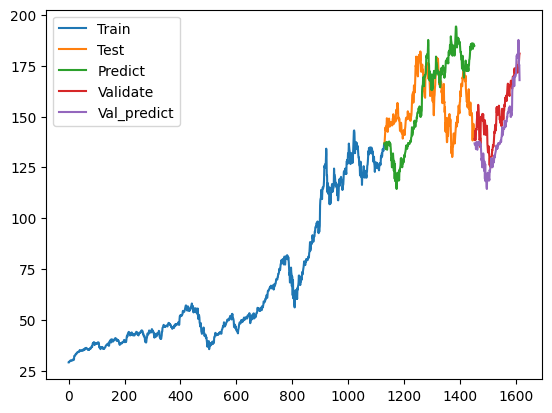

In [15]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,(pred_val))

plt.legend(['Train','Test','Predict', 'Validate', 'Val_predict'])
plt.show()